# 2. Manipulação de Dados 

In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt

In [3]:
itub4 = yf.download('ITUB4.SA', start='2020-01-01', end='2020-12-31')

[*********************100%%**********************]  1 of 1 completed


In [57]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.279999,38.029999,36.990002,38.029999,31.228825,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500000,38.240002,37.450001,37.630001,30.900368,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.549999,37.580002,36.910000,37.070000,30.440512,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070000,37.240002,36.209999,36.209999,29.734306,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450001,36.810001,35.619999,35.619999,29.249825,25980900,21:00:00,7


In [4]:
itub_total = itub4.copy()

In [5]:
itub_serires = itub4['Close']

In [6]:
itub4.index.day

Index([ 2,  3,  6,  7,  8,  9, 10, 13, 14, 15,
       ...
       15, 16, 17, 18, 21, 22, 23, 28, 29, 30],
      dtype='int32', name='Date', length=248)

In [7]:
itub4.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=248)

## 2.1 Datetime Lib

In [8]:
data = '04-05-2024'
data = dt.datetime.strptime(data, '%d-%m-%Y')
data

datetime.datetime(2024, 5, 4, 0, 0)

In [9]:
d = dt.datetime.now()
d

datetime.datetime(2024, 7, 18, 16, 26, 13, 402688)

In [10]:
t = dt.datetime.strftime(d, '%A')

In [11]:
dt.datetime.strftime(d, '%B')

'July'

In [12]:
dt.datetime.strftime(d, '%C')

'20'

### 2.12 TimeDelta

In [13]:
d_m_200 = dt.datetime.now() - dt.timedelta(days=200)

In [14]:
dt.datetime.strftime(d_m_200, '%Y-%m-%d')

'2023-12-31'

### 2.13 Usando o Pandas

In [15]:
data = pd.to_datetime(data, format='%d-%m-%Y')

In [16]:
data

Timestamp('2024-05-04 00:00:00')

In [17]:
pd.date_range(data, periods=5, freq='d')

DatetimeIndex(['2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08'],
              dtype='datetime64[ns]', freq='D')

### 2.14 Variáveis AUX

In [18]:
itub4 = itub4.head()

In [19]:
itub4.index = itub4.index.tz_localize('UTC').tz_convert('America/Sao_Paulo')

In [20]:
itub4['Time'] = itub4.index

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_22584\4153394085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4.index


In [21]:
itub4['Time'] = itub4['Time'].dt.time

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_22584\1433894871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['Time'] = itub4['Time'].dt.time


In [22]:
itub4['DayofYear'] = itub4['Time'].index.dayofyear

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_22584\4289030336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itub4['DayofYear'] = itub4['Time'].index.dayofyear


In [23]:
itub4

,Open,High,Low,Close,Adj Close,Volume,Time,DayofYear
Date,,,,,,,,
2020-01-01 21:00:00-03:00,37.279999,38.029999,36.990002,38.029999,31.228825,20666100,21:00:00,1
2020-01-02 21:00:00-03:00,37.500000,38.240002,37.450001,37.630001,30.900368,24891400,21:00:00,2
2020-01-05 21:00:00-03:00,37.549999,37.580002,36.910000,37.070000,30.440512,22294700,21:00:00,5
2020-01-06 21:00:00-03:00,37.070000,37.240002,36.209999,36.209999,29.734306,20000900,21:00:00,6
2020-01-07 21:00:00-03:00,36.450001,36.810001,35.619999,35.619999,29.249825,25980900,21:00:00,7


##### Método resample

In [24]:
itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})
itub_total

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_22584\1504312676.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  itub_total = itub_total.resample('M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Adj Close':'last'})


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-31,37.279999,38.240002,32.540001,32.820000,26.950567
2020-02-29,33.000000,35.480000,30.570000,32.000000,26.668245
2020-03-31,31.930000,32.290001,20.000000,23.090000,19.251822
2020-04-30,22.219999,25.150000,20.010000,22.770000,18.997355
2020-05-31,21.950001,24.420000,20.730000,23.040001,19.235294
2020-06-30,22.830000,28.700001,22.700001,25.450001,21.261162
2020-07-31,25.600000,28.490000,25.540001,26.889999,22.477386
2020-08-31,27.100000,27.709999,23.510000,23.549999,19.739733
2020-09-30,23.870001,25.500000,22.299999,22.500000,18.871626


<Axes: xlabel='Date'>

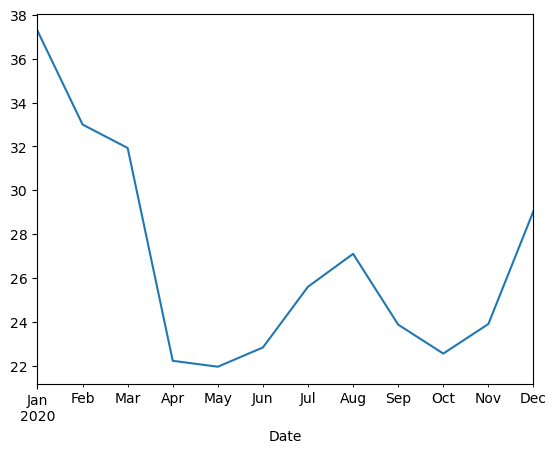

In [25]:
itub_total.Open.plot()

## 2.2 Multi Index

In [42]:
ibov = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]
ibov = [i + '.SA' for i in ibov]

In [43]:
df_ibov = yf.download(ibov, start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%%**********************]  91 of 91 completed

3 Failed downloads:
['ENBR3.SA', 'VIIA3.SA', 'BRML3.SA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [58]:
df_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=546)

In [55]:
set(df_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

<Axes: xlabel='Date'>

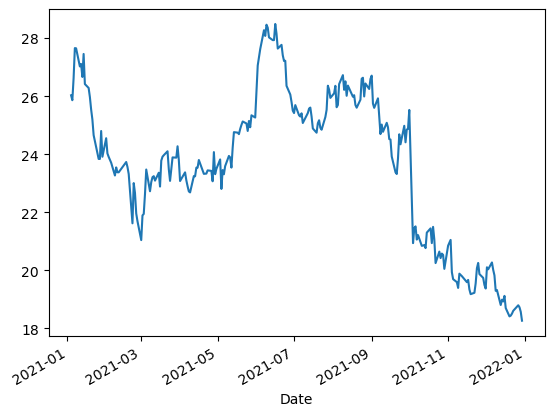

In [60]:
df_ibov[('Adj Close', 'ITUB4.SA')].plot()